# Surface temperature comparison

In [197]:
import act
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import xwrf
import cmweather
import glob
from bokeh.models.formatters import DatetimeTickFormatter
import hvplot.xarray
import holoviews as hv
hv.extension("bokeh")

In [23]:
# Set your username and token here!
username = '---------'
token = '##########'

# Set the datastream and start/enddates
datastream_snow = 'gucmetM1.b1' # snow depth, also precipitation rate
# datastream_metprep = 'gucmetM1.b1' # surface temperature+precipitation
startdate1 = '2022-01-02'
enddate1 = '2022-01-07'
startdate2 = '2022-01-25'
enddate2 = '2022-01-30'
startdate3 = '2023-04-03'
enddate3 = '2023-04-08'

# wrf: snow depth()
# SNOWNC: ACCUMULATED TOTAL GRID SCALE SNOW AND ICE
# SNOWC: FLAG INDICATING SNOW COVERAGE (1 FOR SNOW COVER)

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
datasnow1 = act.discovery.download_arm_data(username, token, datastream_snow, startdate1, enddate1)
datasnow2 = act.discovery.download_arm_data(username, token, datastream_snow, startdate2, enddate2)
datasnow3 = act.discovery.download_arm_data(username, token, datastream_snow, startdate3, enddate3)
# datamet = act.discovery.download_arm_data(username, token, datastream_metprep, startdate, enddate)

[DOWNLOADING] gucmetM1.b1.20220105.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220103.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220104.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220106.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220102.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220107.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1786358

[DOWNLOADING] gucmetM1.b1.20220126.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220127.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220128.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220129.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220125.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220130.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.o

In [34]:
# Let's read in the data using ACT and check out the data
ds_snow1 = act.io.read_arm_netcdf(datasnow1) # 1-min
ds_snow2 = act.io.read_arm_netcdf(datasnow2) # 1-min
ds_snow3 = act.io.read_arm_netcdf(datasnow3) # 1-min

ds_snow1

<xarray.Dataset> Size: 2MB
Dimensions:                       (time: 8640, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 69kB 2022-01-02 ... 2...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     (time) datetime64[ns] 69kB 2022-01-02 ... 2...
    time_offset                   (time) datetime64[ns] 69kB 2022-01-02 ... 2...
    time_bounds                   (time, bound) object 138kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 35kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 35kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 35kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 35kB dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 35kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 35kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           (time) float32 35kB 38.96 38.96 ... 38.96
    lon                           (time) float32 35kB -107.0 -107.0 ... -107.0
    alt                           (time) float32 35kB 2.886e+03 ... 2.886e+03
Attributes: (12/25)
    command_line:                met_ingest -s guc -f M1 -RD --max-runtime 0
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.53-0.el7
    dod_version:                 met-b1-11.2
    input_source:                /data/reproc/D221103.2/collection/guc/gucmet...
    site_id:                     guc
    ...                          ...
    tbrg_precip_corr_info:       0.000000 * tbrg_precip_total^2 + 0.000000 * ...
    history:                     created by user yahmad on machine prod-proc5...
    _file_dates:                 ['20220102', '20220103', '20220104', '202201...
    _file_times:                 ['000000', '000000', '000000', '000000', '00...
    _datastream:                 gucmetM1.b1
    _arm_standards_flag:         1

In [35]:
ds_snow1["temp_mean"] = ds_snow1["temp_mean"] + 273.15
ds_snow2["temp_mean"] = ds_snow2["temp_mean"] + 273.15
ds_snow3["temp_mean"] = ds_snow3["temp_mean"] + 273.15

ds_snow1["temp_mean"]

<xarray.DataArray 'temp_mean' (time: 8640)> Size: 35kB
dask.array<add, shape=(8640,), dtype=float32, chunksize=(1440,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 69kB 2022-01-02 ... 2022-01-07T23:59:00

In [36]:
variable_snow = "tbrg_precip_total_corr"
variable_temp = "temp_mean"

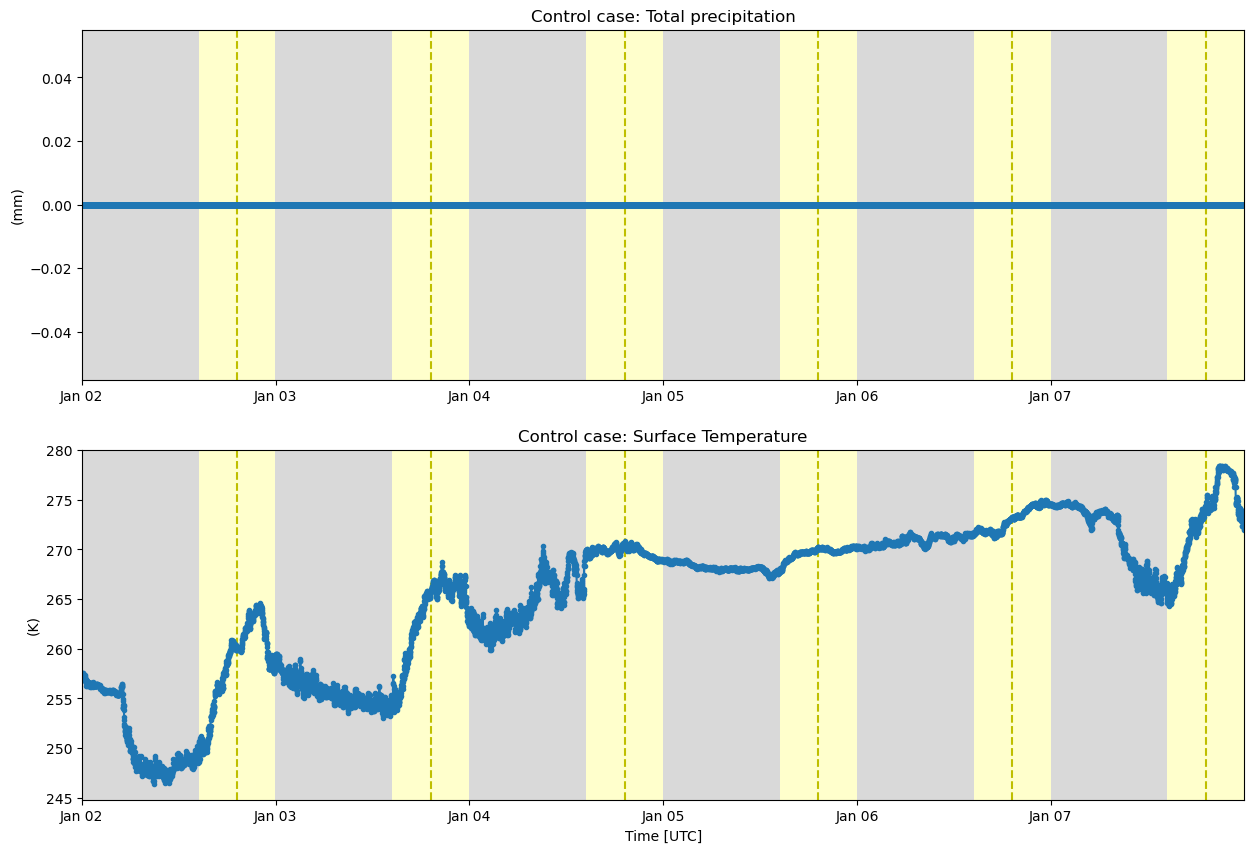

In [215]:
# Jan 2-7 2022
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_snow1,subplot_shape=(2,), figsize=(15,10))

# Plot up the variable in the first plot - Surface precipitation corrected (tbrg_precip_total_corr)
display.plot(variable_snow, subplot_index=(0,),day_night_background=True,
             set_title="Control case: Total precipitation")
# display.day_night_background(subplot_index=(0,))

# Plot up the variable in the second plot - Temperature: temp_mean
display.plot(variable_temp, subplot_index=(1,),day_night_background=True,
             set_title="Control case: Surface Temperature")
# display.day_night_background(subplot_index=(1,))
plt.ylabel('(K)')
plt.show() 

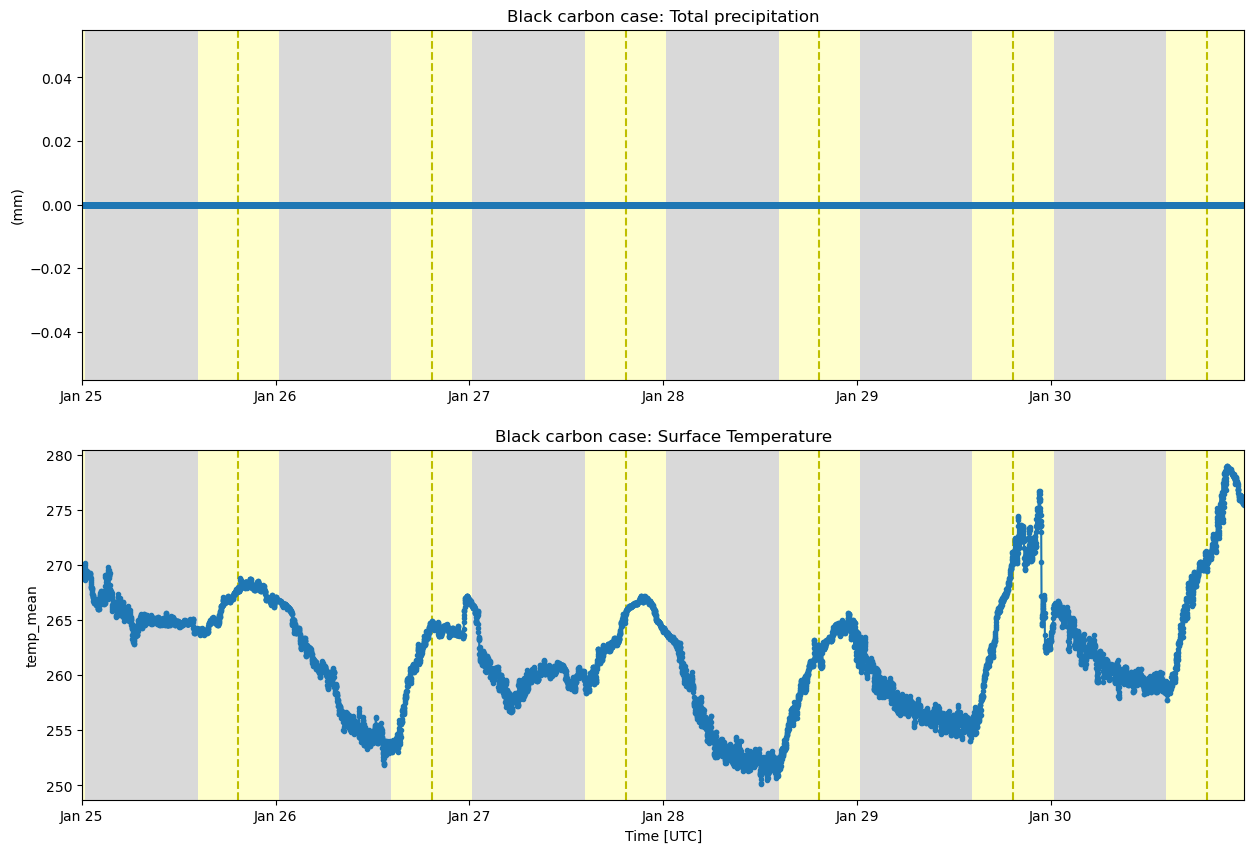

In [38]:
# Jan 25-30 2022
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_snow2,subplot_shape=(2,), figsize=(15,10))

# Plot up the variable in the first plot - Surface precipitation corrected (tbrg_precip_total_corr)
display.plot(variable_snow, subplot_index=(0,),day_night_background=True,
             set_title="Black carbon case: Total precipitation")
# display.day_night_background(subplot_index=(0,))

# Plot up the variable in the second plot - Temperature: temp_mean
display.plot(variable_temp, subplot_index=(1,),day_night_background=True,
             set_title="Black carbon case: Surface Temperature")
# display.day_night_background(subplot_index=(1,))

plt.show() 

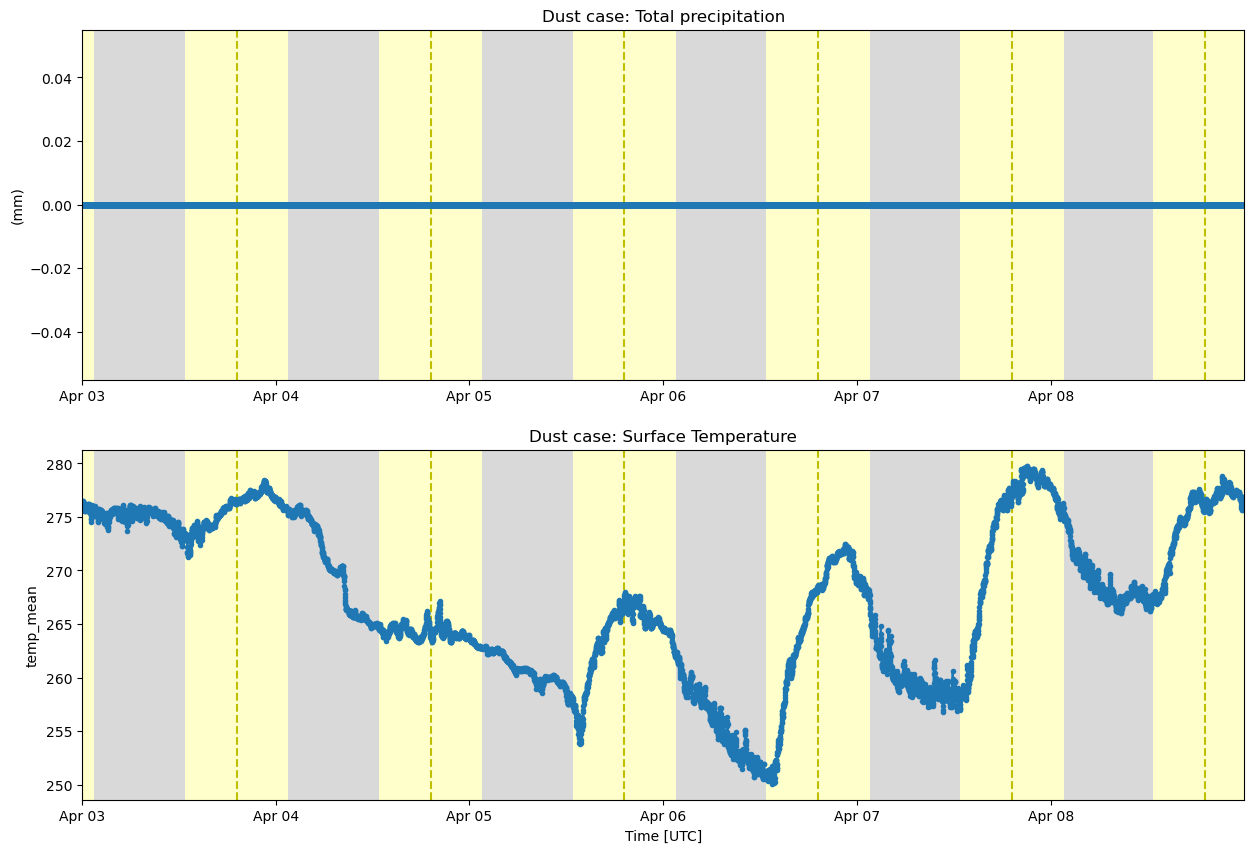

In [39]:
# Apr 3-8 2022
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_snow3,subplot_shape=(2,), figsize=(15,10))

# Plot up the variable in the first plot - Surface precipitation corrected (tbrg_precip_total_corr)
display.plot(variable_snow, subplot_index=(0,),day_night_background=True,
             set_title="Dust case: Total precipitation")
# display.day_night_background(subplot_index=(0,))

# Plot up the variable in the second plot - Temperature: temp_mean
display.plot(variable_temp, subplot_index=(1,),day_night_background=True,
             set_title="Dust case: Surface Temperature")
# display.day_night_background(subplot_index=(1,))

plt.show() 

In [193]:
## WRF
files_ctrl=sorted(glob.glob("/data/home/mqzhang/sail-cookbook/notebooks/downloaded_files/control/*"))
files_bc=sorted(glob.glob("/data/home/mqzhang/sail-cookbook/notebooks/downloaded_files/bc/*"))
files_dust=sorted(glob.glob("/data/home/mqzhang/sail-cookbook/notebooks/downloaded_files/dust/*"))

In [194]:
ds_ctrl = xr.open_mfdataset(files_ctrl,concat_dim="Time",combine="nested").xwrf.postprocess().squeeze()
ds_ctrl

<xarray.Dataset> Size: 543MB
Dimensions:         (Time: 168, y: 201, x: 201)
Coordinates:
  * Time            (Time) datetime64[ns] 1kB 2022-01-02 ... 2022-01-08T23:00:00
  * x               (x) float64 2kB -5.344e+04 -5.294e+04 ... 4.656e+04
  * y               (y) float64 2kB -5.6e+04 -5.55e+04 ... 4.35e+04 4.4e+04
Data variables: (12/22)
    Times           (Time) |S19 3kB dask.array<chunksize=(24,), meta=np.ndarray>
    Q2              (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    T2              (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    PSFC            (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    U10             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    V10             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    ...              ...
    EMISS           (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    HFX             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    QFX             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    LH              (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    SNOWC           (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    wrf_projection  object 8B +proj=lcc +x_0=0 +y_0=0 +a=6370000 +b=6370000 +...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2021-12-31_00:00:00
    WEST-EAST_GRID_DIMENSION:        202
    SOUTH-NORTH_GRID_DIMENSION:      202
    BOTTOM-TOP_GRID_DIMENSION:       50
    DX:                              500.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    history:                         Sat Mar 25 11:56:03 2023: ncrcat /global...
    NCO:                             netCDF Operators version 5.0.1 (Homepage...

In [199]:
formatter = DatetimeTickFormatter(hours="%d %b %Y \n %H:%M UTC")
ds_ctrl["T2"].mean(dim=['x', 'y']).hvplot(xformatter=formatter)

:Curve   [Time]   (T2)

In [201]:
ds_bc = xr.open_mfdataset(files_bc,concat_dim="Time",combine="nested").xwrf.postprocess().squeeze()
ds_bc

<xarray.Dataset> Size: 543MB
Dimensions:         (Time: 168, y: 201, x: 201)
Coordinates:
  * Time            (Time) datetime64[ns] 1kB 2022-01-25 ... 2022-01-31T23:00:00
  * x               (x) float64 2kB -5.344e+04 -5.294e+04 ... 4.656e+04
  * y               (y) float64 2kB -5.6e+04 -5.55e+04 ... 4.35e+04 4.4e+04
Data variables: (12/22)
    Times           (Time) |S19 3kB dask.array<chunksize=(24,), meta=np.ndarray>
    Q2              (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    T2              (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    PSFC            (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    U10             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    V10             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    ...              ...
    EMISS           (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    HFX             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    QFX             (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    LH              (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    SNOWC           (Time, y, x) float32 27MB dask.array<chunksize=(24, 201, 201), meta=np.ndarray>
    wrf_projection  object 8B +proj=lcc +x_0=0 +y_0=0 +a=6370000 +b=6370000 +...
Attributes: (12/88)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2022-01-17_00:00:00
    WEST-EAST_GRID_DIMENSION:        202
    SOUTH-NORTH_GRID_DIMENSION:      202
    BOTTOM-TOP_GRID_DIMENSION:       50
    DX:                              500.0
    ...                              ...
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    history:                         Sat Mar 25 11:57:59 2023: ncrcat /global...
    NCO:                             netCDF Operators version 5.0.1 (Homepage...

In [202]:
ds_bc["T2"].mean(dim=['x', 'y']).hvplot(xformatter=formatter)

:Curve   [Time]   (T2)

In [205]:
ds_dust = xr.open_mfdataset(files_dust,concat_dim="Time",combine="nested").xwrf.postprocess().squeeze()
ds_dust

<xarray.Dataset> Size: 6GB
Dimensions:                    (Time: 28, y: 201, x: 201, soil_layers_stag: 4,
                                z: 49, x_stag: 202, y_stag: 202, z_stag: 50,
                                seed_dim_stag: 2, snow_layers_stag: 3,
                                snso_layers_stag: 7)
Coordinates: (12/15)
    CLAT                       (y, x) float32 162kB dask.array<chunksize=(101, 101), meta=np.ndarray>
    XLAT                       (y, x) float32 162kB dask.array<chunksize=(101, 101), meta=np.ndarray>
    XLONG                      (y, x) float32 162kB dask.array<chunksize=(101, 101), meta=np.ndarray>
    XTIME                      (Time) datetime64[ns] 224B dask.array<chunksize=(1,), meta=np.ndarray>
    XLAT_U                     (y, x_stag) float32 162kB dask.array<chunksize=(101, 101), meta=np.ndarray>
    XLONG_U                    (y, x_stag) float32 162kB dask.array<chunksize=(101, 101), meta=np.ndarray>
    ...                         ...
  * z_stag                     (z_stag) float32 200B 1.0 0.9935 ... 0.006181 0.0
  * Time                       (Time) datetime64[ns] 224B 2023-04-03 ... 2023...
  * x                          (x) float64 2kB -5.344e+04 ... 4.656e+04
  * y                          (y) float64 2kB -5.6e+04 -5.55e+04 ... 4.4e+04
  * y_stag                     (y_stag) float64 2kB -5.625e+04 ... 4.425e+04
  * x_stag                     (x_stag) float64 2kB -5.369e+04 ... 4.681e+04
Dimensions without coordinates: soil_layers_stag, seed_dim_stag,
                                snow_layers_stag, snso_layers_stag
Data variables: (12/352)
    Times                      (Time) |S19 532B dask.array<chunksize=(1,), meta=np.ndarray>
    LU_INDEX                   (Time, y, x) float32 5MB dask.array<chunksize=(1, 101, 101), meta=np.ndarray>
    ZS                         (Time, soil_layers_stag) float32 448B dask.array<chunksize=(1, 4), meta=np.ndarray>
    DZS                        (Time, soil_layers_stag) float32 448B dask.array<chunksize=(1, 4), meta=np.ndarray>
    VAR_SSO                    (Time, y, x) float32 5MB dask.array<chunksize=(1, 101, 101), meta=np.ndarray>
    BATHYMETRY_FLAG            (Time) int32 112B dask.array<chunksize=(1,), meta=np.ndarray>
    ...                         ...
    geopotential_height        (Time, z_stag, y, x) float32 226MB dask.array<chunksize=(1, 50, 101, 101), meta=np.ndarray>
    wind_east                  (Time, z, y, x) float32 222MB dask.array<chunksize=(1, 49, 100, 100), meta=np.ndarray>
    wind_north                 (Time, z, y, x) float32 222MB dask.array<chunksize=(1, 49, 100, 100), meta=np.ndarray>
    wind_east_10               (Time, y, x) float32 5MB dask.array<chunksize=(1, 101, 101), meta=np.ndarray>
    wind_north_10              (Time, y, x) float32 5MB dask.array<chunksize=(1, 101, 101), meta=np.ndarray>
    wrf_projection             object 8B +proj=lcc +x_0=0 +y_0=0 +a=6370000 +...
Attributes: (12/153)
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2023-03-25_00:00:00
    SIMULATION_START_DATE:           2021-09-15_00:00:00
    WEST-EAST_GRID_DIMENSION:        202
    SOUTH-NORTH_GRID_DIMENSION:      202
    BOTTOM-TOP_GRID_DIMENSION:       50
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [214]:
ds_dust["T2"].load()
ds_dust["T2"].mean(dim=['x', 'y']).hvplot(x="Time")

:Curve   [Time]   (T2)